In [1]:
import glob

In [2]:
P = pd.read_pickle('../../../greenness_timing/ca_met/Providence_Creek/providence_crk_upper.pcl')

In [3]:
P['datetime'] = P.index

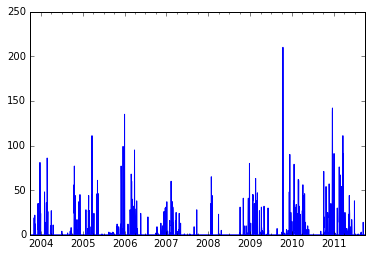

In [4]:
P.precip.plot()

In [5]:
P.index.max()

Timestamp('2011-09-30 00:00:00')

In [6]:
files = glob.glob('./data/providence_upper/*.csv')

In [7]:
files

['./data/providence_upper/WY_2012_UpMetS_soil_snow_daily.csv',
 './data/providence_upper/WY_2011_UpMetS_soil_snow_daily.csv',
 './data/providence_upper/WY_2010_UpMetS_soil_snow_daily.csv',
 './data/providence_upper/WY_2009_UpMetS_Soil_snow_daily.csv',
 './data/providence_upper/WY_2008_UpMetS_Soil_snow_daily.csv']

In [8]:
temp = pd.DataFrame()
for fl in files:
    tmp = pd.read_csv(fl)
    tmp.index = pd.DatetimeIndex(tmp.date_time)
    tmp.loc[tmp.Tave<-500,'Tave'] = np.NaN
    tmp.loc[tmp.Tmax<-500,'Tmax'] = np.NaN
    tmp.loc[tmp.Tmin<-500,'Tmin'] = np.NaN
    del tmp['date_time']
    temp = temp.append(tmp)

In [9]:
temp.sort_index(inplace=True)

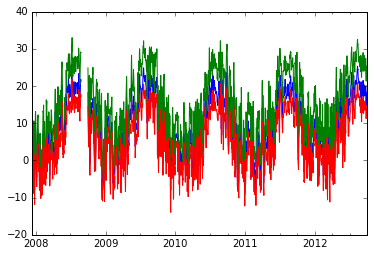

In [10]:
temp.Tave.plot()
temp.Tmax.plot()
temp.Tmin.plot()

In [11]:
temp['datetime'] = temp.index

In [12]:
P['datetime'] = P.index

In [13]:
dat = pd.merge(left=temp, right=P, on='datetime')

In [14]:
dat.index = pd.DatetimeIndex(dat.datetime)

In [15]:
strt = '2008-10-1'

In [16]:
dat = dat[strt:].copy()

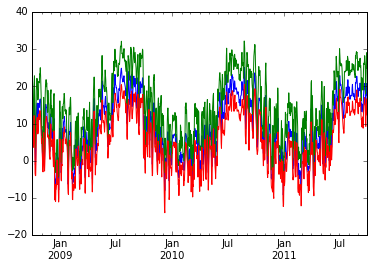

In [17]:
dat.Tave.plot()
dat.Tmax.plot()
dat.Tmin.plot()

In [18]:
dat['rain_duration'] = 3

In [19]:
dat.to_pickle('./data/providence_upper_met_p.pcl')

In [17]:
dat.index[0].year

2008

In [18]:
header = '%s %s %s'%(dat.index[0].year,dat.index[0].month,dat.index[0].day)

In [22]:
dat.head()

,Tave,Tmax,Tmin,datetime,precip,flag,rain_duration
2008-10-01,18.203333,24.870,14.480,2008-10-01,0,G,3
2008-10-02,14.393333,18.960,10.240,2008-10-02,0,G,3
2008-10-03,10.579292,14.520,6.913,2008-10-03,2,G,3
2008-10-04,6.088833,7.442,3.633,2008-10-04,31,G,3
2008-10-05,6.412625,9.840,3.633,2008-10-05,0,G,3


In [21]:
dat.tail()

,Tave,Tmax,Tmin,datetime,precip,flag,rain_duration
2011-09-26,14.567660,21.88,9.26,2011-09-26,0,G,3
2011-09-27,18.686809,24.38,15.33,2011-09-27,0,G,3
2011-09-28,19.705745,26.55,15.49,2011-09-28,0,G,3
2011-09-29,20.793830,29.08,16.68,2011-09-29,0,G,3
2011-09-30,17.590426,24.90,12.32,2011-09-30,0,G,3


In [19]:
header

'2008 10 1'

In [20]:
np.savetxt('/RHESSys/providence/theo_p301_flux/clim/upper.tavg',dat.Tave,header=header,comments='',fmt='%f')
np.savetxt('/RHESSys/providence/theo_p301_flux/clim/upper.tmin',dat.Tmin,header=header,comments='',fmt='%f')
np.savetxt('/RHESSys/providence/theo_p301_flux/clim/upper.tmax',dat.Tmax,header=header,comments='',fmt='%f')
np.savetxt('/RHESSys/providence/theo_p301_flux/clim/upper.rain',dat.precip/1000.,header=header,comments='',fmt='%f')
np.savetxt('/RHESSys/providence/theo_p301_flux/clim/upper.rain_duration',dat.rain_duration,header=header,comments='',fmt='%f')

# make spinup

In [32]:
wy1 = dat['2008-10-01':'2009-09-30'].copy()
wy2 = dat['2009-10-01':'2010-09-30'].copy()
wy3 = dat['2010-10-01':'2011-09-30'].copy()
wy4 = dat['2009-09-30':'2010-09-30'].copy()

In [33]:
wy1.reset_index(inplace=1)
wy2.reset_index(inplace=1)
wy3.reset_index(inplace=1)
wy4.reset_index(inplace=1)

In [53]:
tmp = pd.concat([wy1,wy2,wy3,wy4],axis=0) # 4 years with leap year at the end
del tmp['index']
del tmp['datetime']
del tmp['flag']

In [54]:
tmp.shape

(1461, 5)

In [55]:
n = 150
su = pd.DataFrame({'Tave':np.tile(tmp.Tave,n),'Tmax':np.tile(tmp.Tmax,n),'Tmin':np.tile(tmp.Tmin,n),
                   'P':np.tile(tmp.precip,n),'rain_duration':np.tile(tmp.rain_duration,n)})

In [84]:
ed = pd.datetime(2012,9,30)
td = pd.datetools.timedelta(len(su))
sd = ed - td

In [85]:
header = "%s %s %s"%(sd.year,sd.month,sd.day)
header

'1412 9 26'

In [75]:
np.savetxt('/RHESSys/providence/theo_p301_flux/clim/su.tavg',su.Tave,header=header,comments='',fmt='%f')
np.savetxt('/RHESSys/providence/theo_p301_flux/clim/su.tmin',su.Tmin,header=header,comments='',fmt='%f')
np.savetxt('/RHESSys/providence/theo_p301_flux/clim/su.tmax',su.Tmax,header=header,comments='',fmt='%f')
np.savetxt('/RHESSys/providence/theo_p301_flux/clim/su.rain',su.P/1000.,header=header,comments='',fmt='%f')
np.savetxt('/RHESSys/providence/theo_p301_flux/clim/su.rain_duration',su.rain_duration,header=header,comments='',fmt='%f')

### Now make long versions of the original met forcing for calibration...

In [76]:
n = 3
lng = pd.DataFrame({'Tave':np.tile(tmp.Tave,n),'Tmax':np.tile(tmp.Tmax,n),'Tmin':np.tile(tmp.Tmin,n),
                   'P':np.tile(tmp.precip,n),'rain_duration':np.tile(tmp.rain_duration,n)})

In [77]:
ed = pd.datetime(2012,9,30)
td = pd.datetools.timedelta(len(lng))
sd = ed - td

In [78]:
header = "%s %s %s"%(sd.year,sd.month,sd.day)

In [79]:
header

'2000 9 30'

In [80]:
np.savetxt('/RHESSys/providence/theo_p301_flux/clim/upper_long.tavg',lng.Tave,header=header,comments='',fmt='%f')
np.savetxt('/RHESSys/providence/theo_p301_flux/clim/upper_long.tmin',lng.Tmin,header=header,comments='',fmt='%f')
np.savetxt('/RHESSys/providence/theo_p301_flux/clim/upper_long.tmax',lng.Tmax,header=header,comments='',fmt='%f')
np.savetxt('/RHESSys/providence/theo_p301_flux/clim/upper_long.rain',lng.P/1000.,header=header,comments='',fmt='%f')
np.savetxt('/RHESSys/providence/theo_p301_flux/clim/upper_long.rain_duration',lng.rain_duration,header=header,comments='',fmt='%f')